In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as ss

In [ ]:
#from google.colab import files
#uploded=files.upload()

Saving Copy of energy_production (1).csv to Copy of energy_production (1).csv


In [2]:
df = pd.read_csv('Copy of energy_production.csv',sep = ';',)


In [3]:
df.head()

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0         9.59           38.56       1017.01       60.10             481.30
1        12.04           42.34       1019.72       94.67             465.36
2        13.87           45.08       1024.42       81.69             465.48
3        13.72           54.30       1017.89       79.08             467.05
4        15.14           49.64       1023.78       75.00             463.58

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [5]:
df.describe()

temperature  exhaust_vacuum  amb_pressure   r_humidity  \
count  9568.000000     9568.000000   9568.000000  9568.000000   
mean     19.651231       54.305804   1013.259078    73.308978   
std       7.452473       12.707893      5.938784    14.600269   
min       1.810000       25.360000    992.890000    25.560000   
25%      13.510000       41.740000   1009.100000    63.327500   
50%      20.345000       52.080000   1012.940000    74.975000   
75%      25.720000       66.540000   1017.260000    84.830000   
max      37.110000       81.560000   1033.300000   100.160000   

       energy_production  
count        9568.000000  
mean          454.365009  
std            17.066995  
min           420.260000  
25%           439.750000  
50%           451.550000  
75%           468.430000  
max           495.760000

In [6]:
df.r_humidity.median()

74.975

In [7]:
df.shape

(9568, 5)

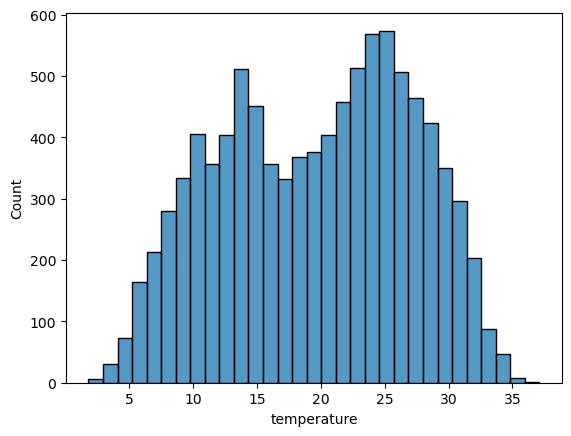

In [9]:
sb.histplot(data= df.temperature)
plt.show()

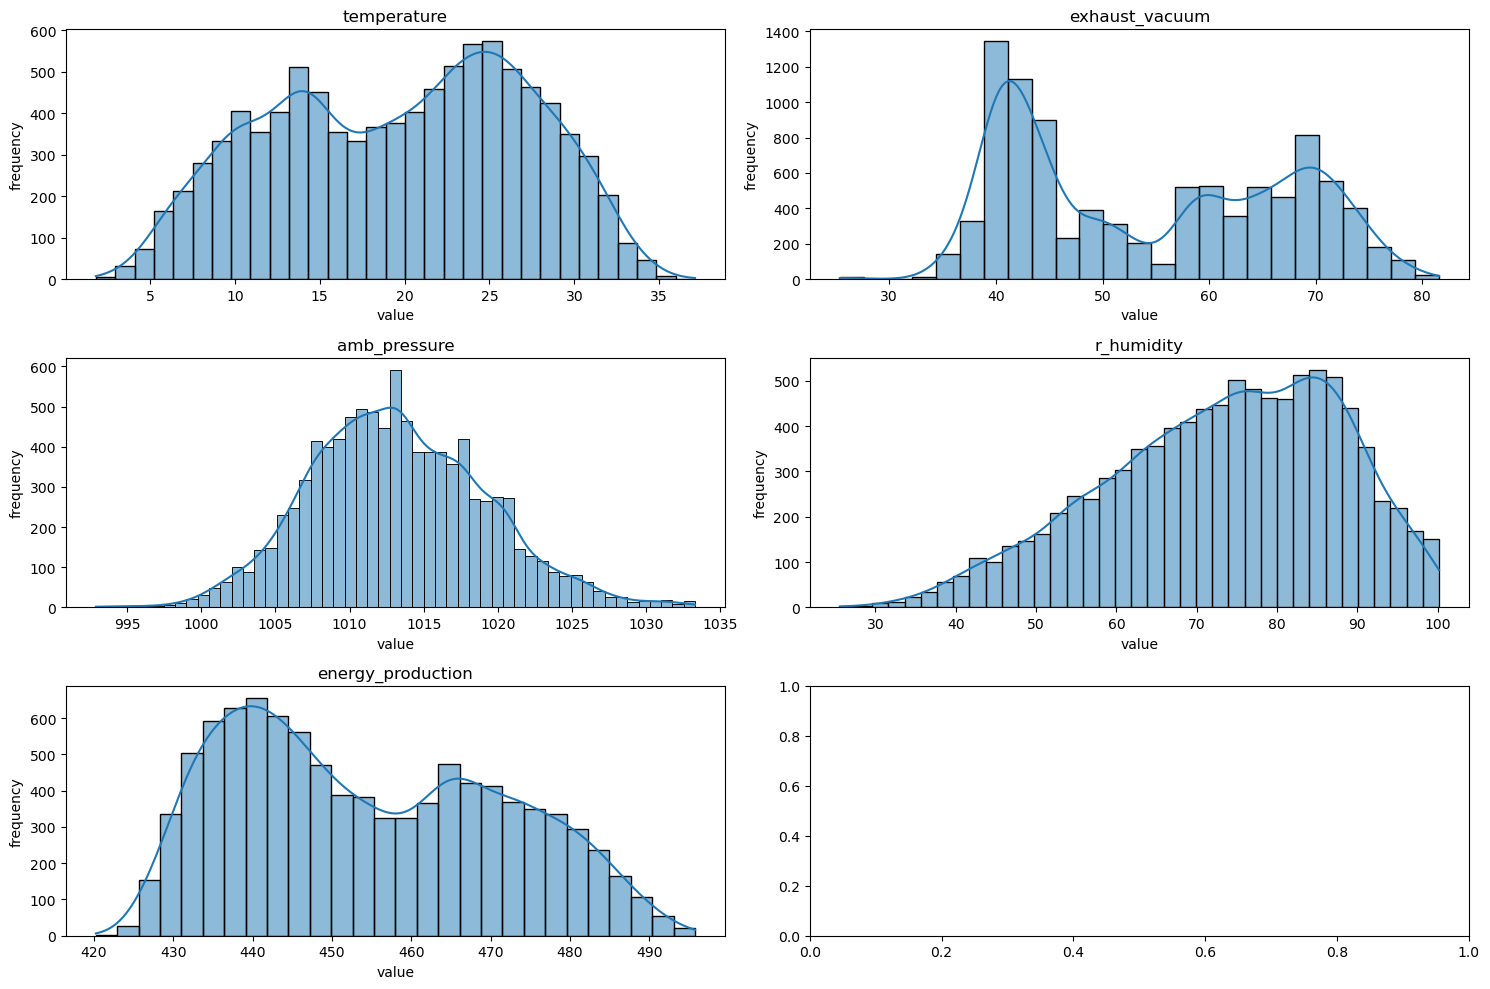

In [10]:
fig, axes = plt.subplots(nrows = 3,ncols= 2,figsize = (15,10))
axes = axes.flatten()
for i, col in enumerate(df.columns):
    sb.histplot(df[col], ax=axes[i], kde= True)
    axes[i].set_title(col)
    axes[i].set_xlabel('value')
    axes[i].set_ylabel('frequency')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

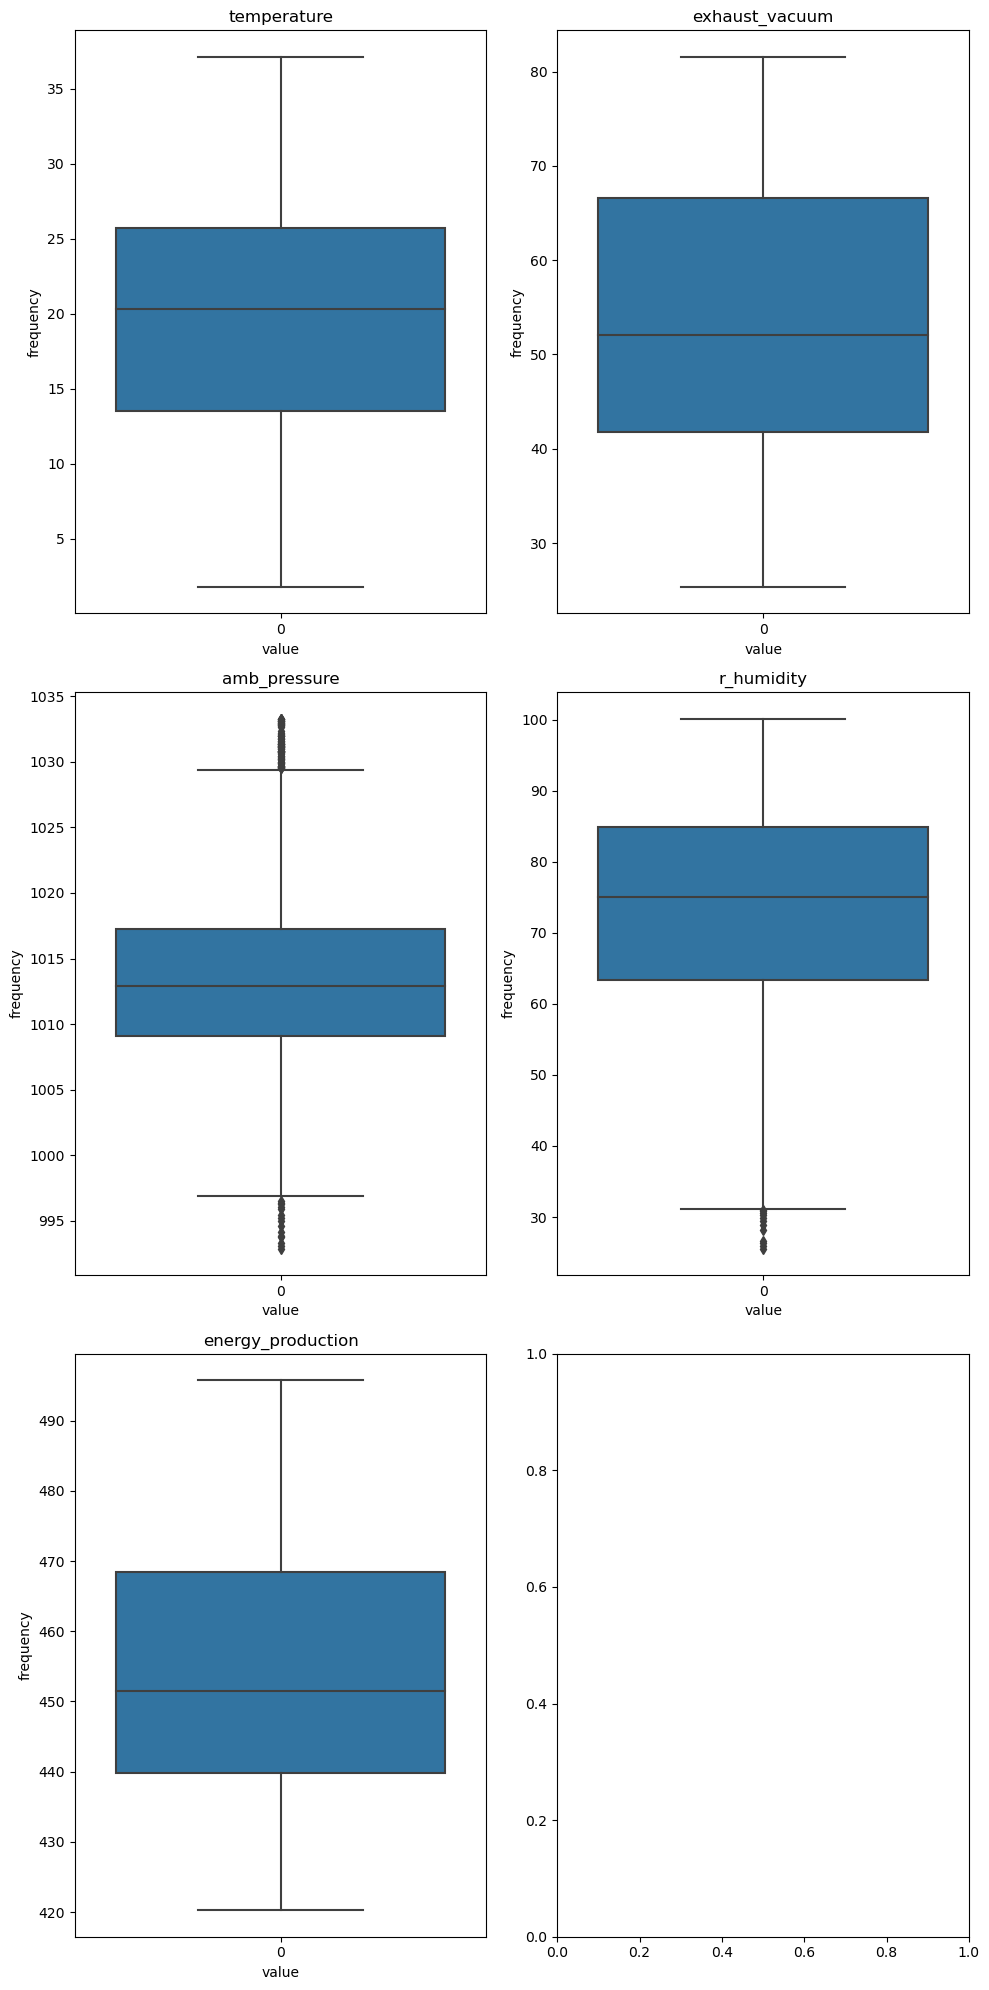

In [11]:
fig, axes = plt.subplots(nrows = 3,ncols= 2,figsize = (10,20))
axes = axes.flatten()
for i, col in enumerate(df.columns):
    sb.boxplot(data = df[col],ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('value')
    axes[i].set_ylabel('frequency')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

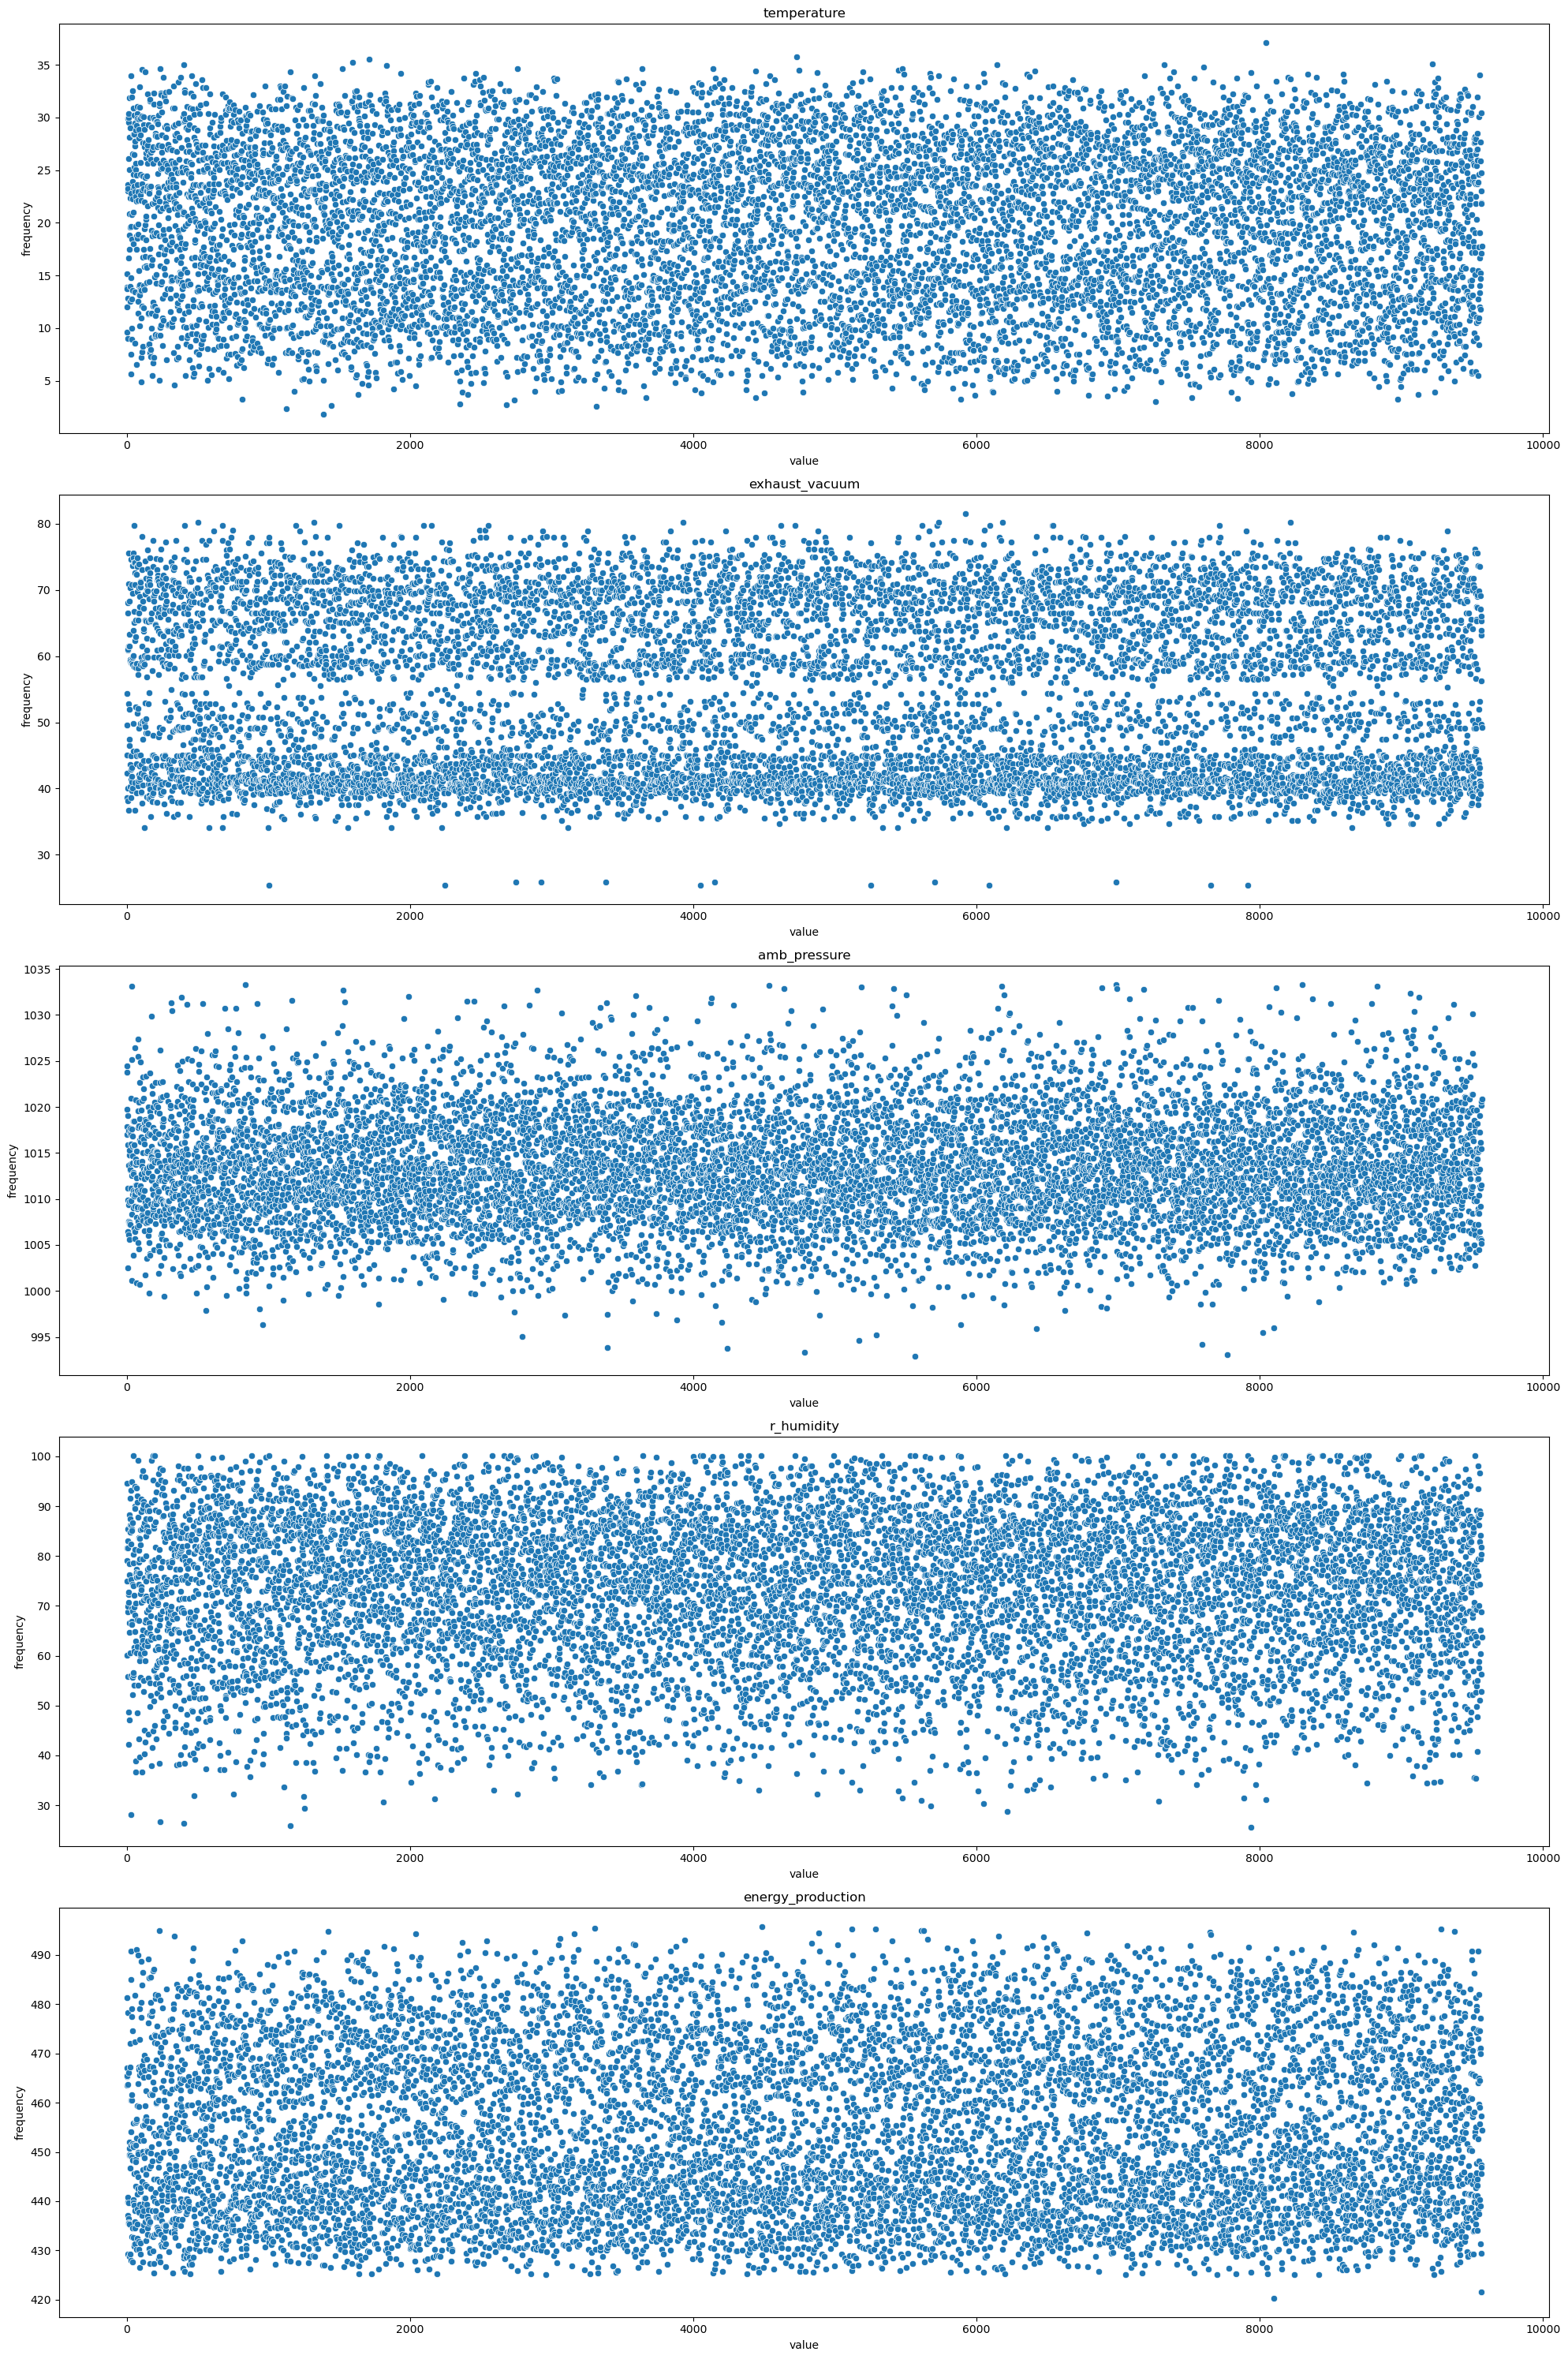

In [12]:
fig, axes = plt.subplots(nrows = 5,ncols= 1,figsize = (20,30))
axes = axes.flatten()
for i, col in enumerate(df.columns):
    sb.scatterplot(data = df[col],ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('value')
    axes[i].set_ylabel('frequency')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

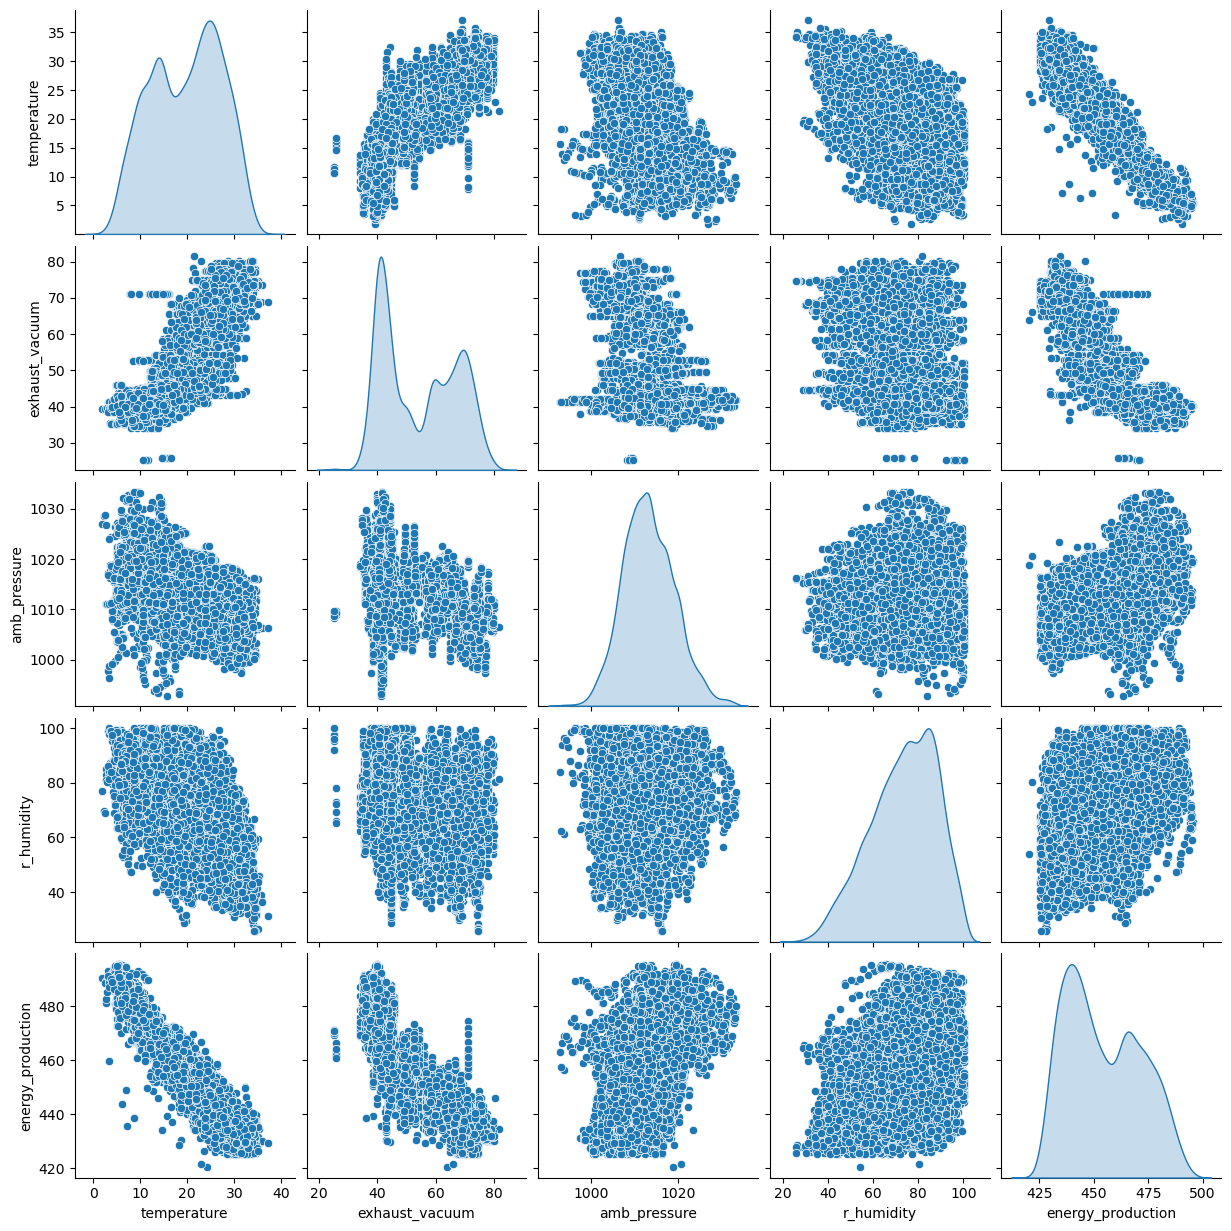

In [13]:
sb.pairplot(df, diag_kind='kde')

In [14]:
data = df.corr()
data

temperature  exhaust_vacuum  amb_pressure  r_humidity  \
temperature           1.000000        0.844107     -0.507549   -0.542535   
exhaust_vacuum        0.844107        1.000000     -0.413502   -0.312187   
amb_pressure         -0.507549       -0.413502      1.000000    0.099574   
r_humidity           -0.542535       -0.312187      0.099574    1.000000   
energy_production    -0.948128       -0.869780      0.518429    0.389794   

                   energy_production  
temperature                -0.948128  
exhaust_vacuum             -0.869780  
amb_pressure                0.518429  
r_humidity                  0.389794  
energy_production           1.000000

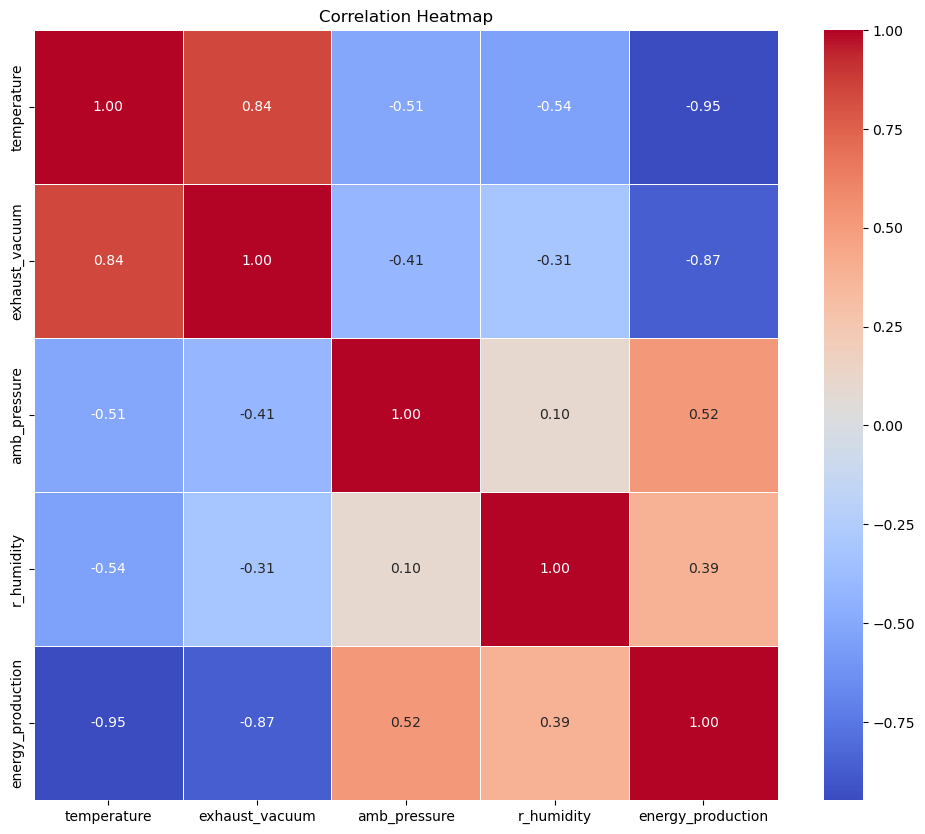

In [15]:
plt.figure(figsize=(12, 10))
sb.heatmap(data, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

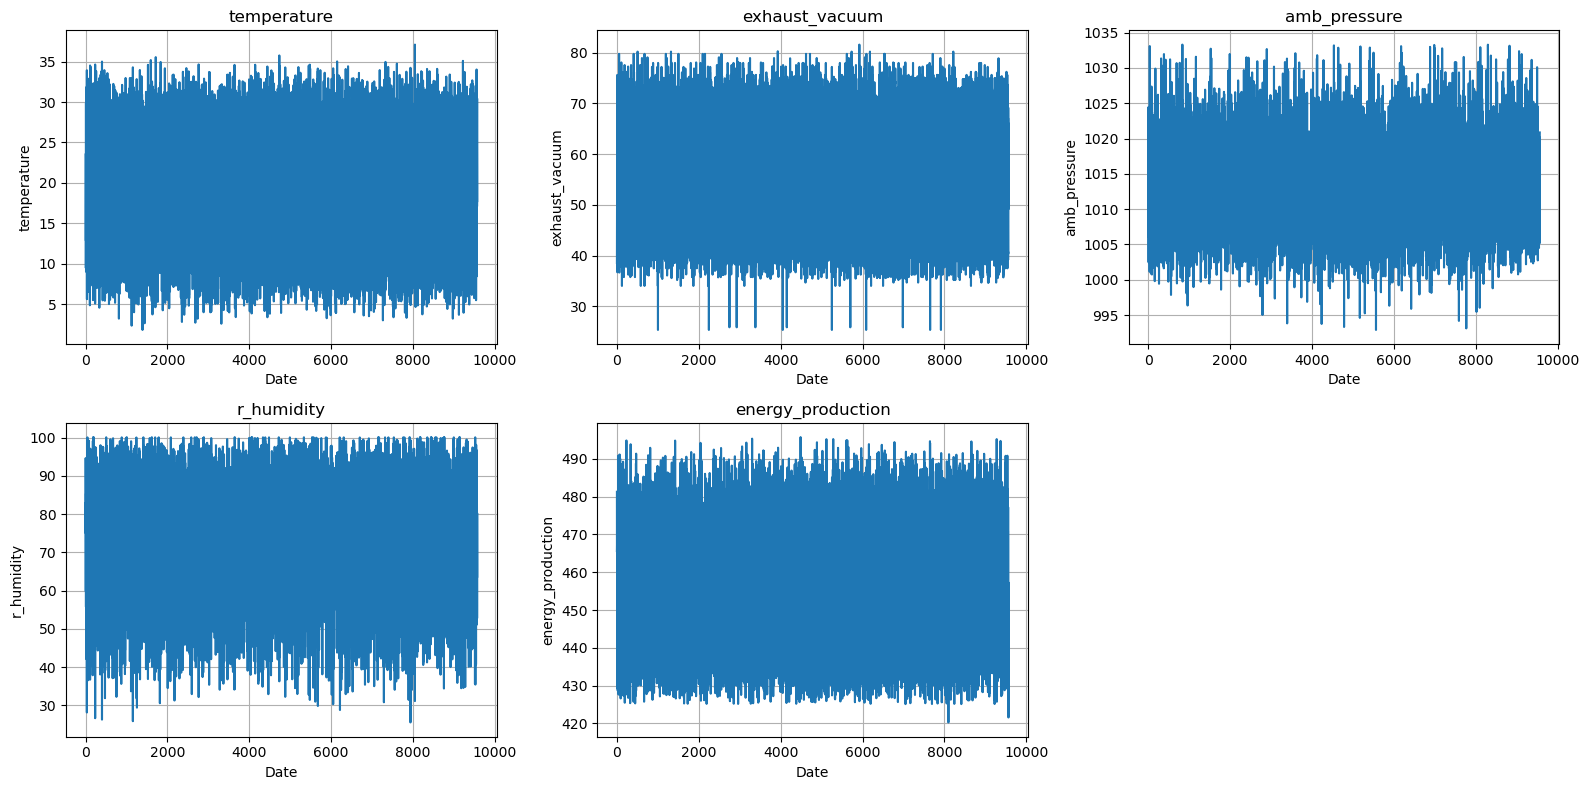

In [16]:
plt.figure(figsize=(16,8))

for i,col in enumerate(df.columns):
    plt.subplot(2,3,i+1)
    plt.grid(True)
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.plot(df[col])
    plt.title(col)

plt.tight_layout()

plt.show()


Lambda value: 1.7815214213889854


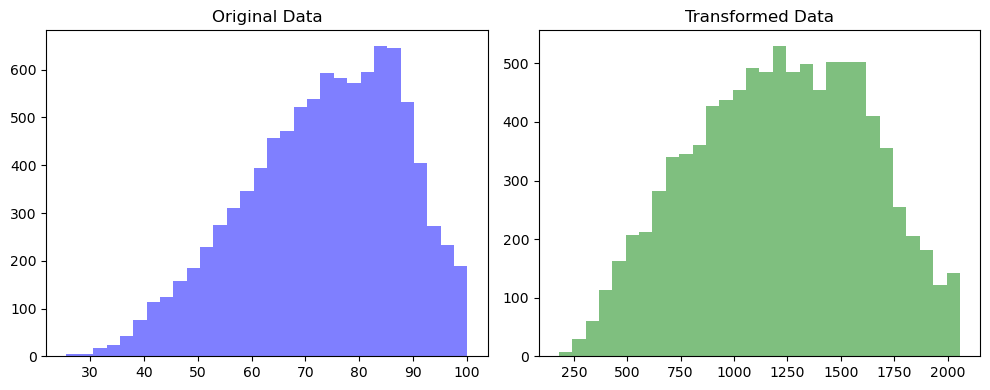

In [17]:
#Box-Cox transformation
transformed_data, lambda_value = ss.boxcox(df.r_humidity)

print("Lambda value:", lambda_value)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(df.r_humidity, bins=30, color='blue', alpha=0.5)
plt.title('Original Data')

#histogram of transformed data
plt.subplot(1, 2, 2)
plt.hist(transformed_data, bins=30, color='green', alpha=0.5)
plt.title('Transformed Data')

plt.tight_layout()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1bc4f66e9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bc4f66fc50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bc4f66e2d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bc4f680d50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bc4f66f210>],
 'means': []}

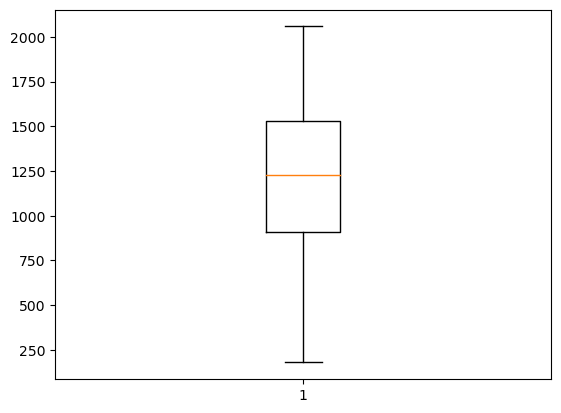

In [18]:
plt.boxplot(transformed_data)

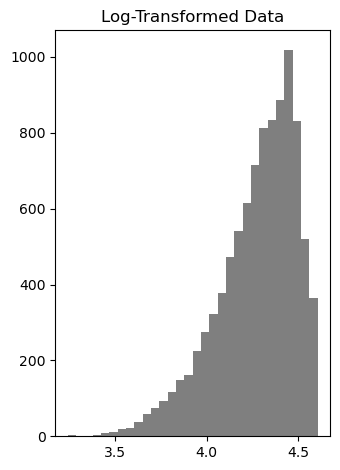

In [19]:
transformed_data1 = np.log(df.r_humidity)

# Plot histogram of transformed data
plt.subplot(1, 2, 2)
plt.hist(transformed_data1, bins=30, color='black', alpha=0.5)
plt.title('Log-Transformed Data')

plt.tight_layout()
plt.show()

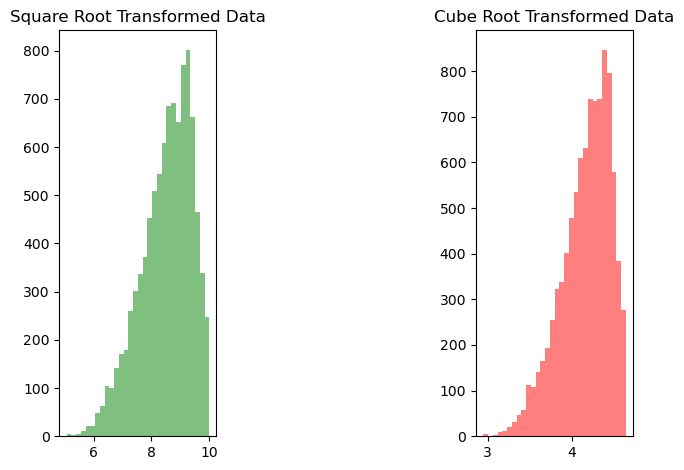

In [20]:
# Square root transformation
sqrt_transformed_data = np.sqrt(df.r_humidity)
plt.subplot(1, 3, 1)
plt.hist(sqrt_transformed_data, bins=30, color='green', alpha=0.5)
plt.title('Square Root Transformed Data')

# Cube root transformation
cbrt_transformed_data = np.cbrt(df.r_humidity)
plt.subplot(1, 3, 3)
plt.hist(cbrt_transformed_data, bins=30, color='red', alpha=0.5)
plt.title('Cube Root Transformed Data')

plt.tight_layout()
plt.show()

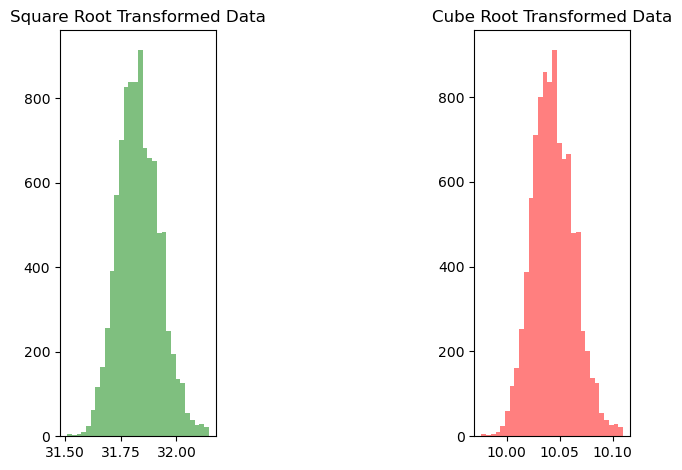

In [21]:
# Square root transformation
sqrt_transformed_data = np.sqrt(df.amb_pressure)
plt.subplot(1, 3, 1)
plt.hist(sqrt_transformed_data, bins=30, color='green', alpha=0.5)
plt.title('Square Root Transformed Data')

# Cube root transformation
cbrt_transformed_data = np.cbrt(df.amb_pressure)
plt.subplot(1, 3, 3)
plt.hist(cbrt_transformed_data, bins=30, color='red', alpha=0.5)
plt.title('Cube Root Transformed Data')

plt.tight_layout()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1bc52345e50>,
 'caps': [<matplotlib.lines.Line2D at 0x1bc52347410>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bc52345890>],
 'medians': [<matplotlib.lines.Line2D at 0x1bc5235c4d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bc52436650>],
 'means': []}

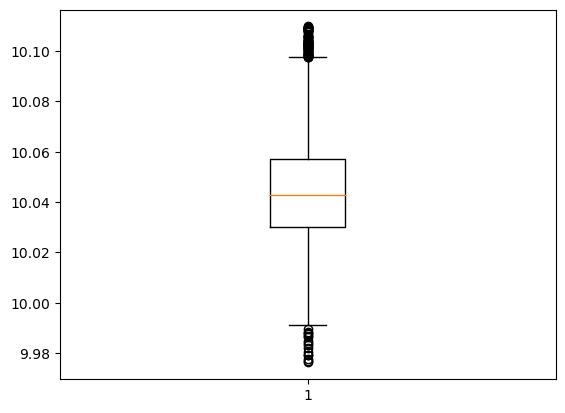

In [22]:
plt.boxplot(cbrt_transformed_data)

{'whiskers': [<matplotlib.lines.Line2D at 0x1bc523aebd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bc523b4210>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bc523ae110>],
 'medians': [<matplotlib.lines.Line2D at 0x1bc523b5750>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bc523afcd0>],
 'means': []}

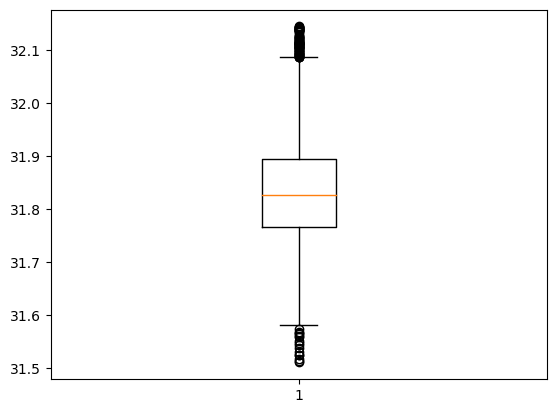

In [23]:
plt.boxplot(sqrt_transformed_data)

In [24]:
#Splitting X & Y Variable
X = df.iloc[:,0:4]
Y = df.iloc[:,4]
X.head()

temperature  exhaust_vacuum  amb_pressure  r_humidity
0         9.59           38.56       1017.01       60.10
1        12.04           42.34       1019.72       94.67
2        13.87           45.08       1024.42       81.69
3        13.72           54.30       1017.89       79.08
4        15.14           49.64       1023.78       75.00

In [25]:
Y.head()

0    481.30
1    465.36
2    465.48
3    467.05
4    463.58
Name: energy_production, dtype: float64

Linear Model




In [26]:
#Model
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
# Train & Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

Lmodel = LinearRegression()
Lmodel.fit(X_train,Y_train)
Lmodel.score(X_test,Y_test)*100

91.98969303303214

Lasso and Ridge Regression

In [27]:

# Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(X_train, Y_train)

# Generate Prediction on test set
lreg_y_pred = lreg.predict(X_test)

# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - Y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)

# Putting together the coefficient and their corrsponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = X_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficient)


Mean squared Error on test set :  22.16847142304461
          Columns  Coefficient Estimate
0     temperature             -1.990857
1  exhaust_vacuum             -0.231053
2    amb_pressure              0.059925
3      r_humidity             -0.159278


<Axes: xlabel='Coefficient Estimate', ylabel='Columns'>

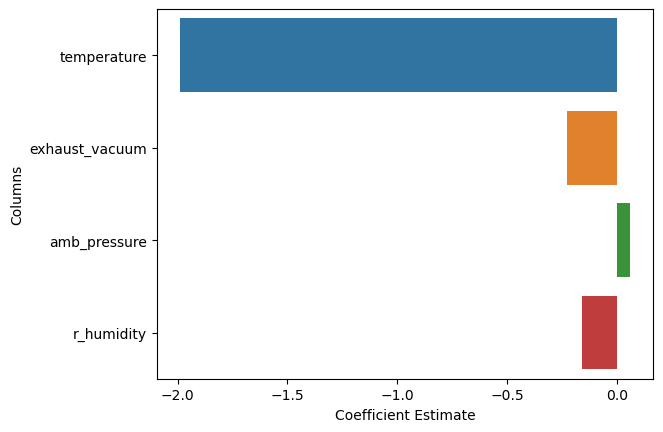

In [28]:
import seaborn as sns
sns.barplot(x='Coefficient Estimate' , y='Columns', data=lreg_coefficient)

In [29]:
# Ridge regression
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(X_train, Y_train)
y_pred = ridgeR.predict(X_test)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - Y_test)**2)
print("Mean_Squared_error:",mean_squared_error_ridge)

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= X_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

Mean_Squared_error: 22.168437855000768
          Columns  Coefficient Estimate
0     temperature             -1.990830
1  exhaust_vacuum             -0.231064
2    amb_pressure              0.059931
3      r_humidity             -0.159273


In [30]:
# Lasso Regression
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(X_train, Y_train)
y_pred1 = lasso.predict(X_test)

# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - Y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = X_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)

Mean squared error on test set 22.13623856963723
          Columns  Coefficient Estimate
0     temperature             -1.936103
1  exhaust_vacuum             -0.248968
2    amb_pressure              0.047210
3      r_humidity             -0.143795


KNN Model

In [41]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,KFold



n_neighbors = np.array(range(1,41))
param_grid = dict(n_neighbors=n_neighbors)
model = KNeighborsRegressor()
grid = GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(X_train,Y_train)
print(grid.best_score_)
print(grid.best_params_)

0.9452147554977568
{'n_neighbors': 5}


In [32]:
from sklearn import metrics
KNN_model = KNeighborsRegressor(n_neighbors=5)
KNN_model.fit(X_train,Y_train)
KNeighborsRegressor()
Y_pred = KNN_model.predict(X_test)
KNN_1 = metrics.explained_variance_score(Y_test,Y_pred)
print("Accuracy:" ,KNN_1)

Accuracy: 0.9392280517959238


Ensemble Techniques

In [48]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
# Decision Tree Regressor
seed = 7
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
cart = DecisionTreeRegressor()
num_trees = 100
model_1 = BaggingRegressor(estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X_train, Y_train, cv=kfold)

In [49]:
print(results.mean())

0.963304926425087


In [50]:
# Random Forest Regressor
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model_2 = RandomForestRegressor(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X_train, Y_train, cv=kfold)
print(results.mean())


0.9631805684969587


In [51]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold

num_trees = 10
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
model_3 = xgb.XGBRegressor(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X_train, Y_train, cv=kfold)
print(results.mean())


0.9633070862540208


In [52]:
# Adaboost Regressor
num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
model_4 = AdaBoostRegressor(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X_train, Y_train, cv=kfold)
print(results.mean())

0.9630862465850779


In [39]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import explained_variance_score

param_grid_svm = {'kernel': ['rbf']}

# Initialize SVM model
svm_model = SVR()

# Perform grid search
grid_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm)
grid_svm.fit(X_train, Y_train)

# Print best score and best parameters
print(grid_svm.best_score_)
print(grid_svm.best_params_)

# Initialize SVM model with best parameters
best_svm_model = SVR(kernel=grid_svm.best_params_['kernel'])

# Fit the model on training data
best_svm_model.fit(X_train, Y_train)

# Make predictions on test data
Y_pred_svm = best_svm_model.predict(X_test)

# Calculate explained variance score
svm_score = explained_variance_score(Y_test, Y_pred_svm)

# Print accuracy
print("Accuracy:", svm_score)


0.3174011856315932
{'kernel': 'rbf'}
Accuracy: 0.4051872373637966


In [54]:
# Random Forest Regressor
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model_2 = RandomForestRegressor(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X_train, Y_train, cv=kfold)
print(results.mean())

0.9632550248741479


In [57]:
# Fit the model on the entire training data
model_2.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = model_2.predict(X_test)

In [59]:
# Evaluate the model performance
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 11.782996543829716
Root Mean Squared Error: 3.4326369665069034
R-squared: 0.9574235780601987


In [61]:
input_data=[[12.04,42.34,1019.72,94.67]]
predicted_output=model_2.predict(input_data)
print('Predicted Energy Production:',predicted_output)

Predicted Energy Production: [465.7097]


C:\Users\palth\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [62]:
import pickle

In [63]:
filename='trained_model.sav'
pickle.dump(model_2,open(filename,'wb'))

In [64]:
load_model=pickle.load(open('trained_model.sav','rb'))

In [65]:
input_data=[[12.04,42.34,1019.72,94.67]]
predicted_output=load_model.predict(input_data)
print('Predicted Energy Production:',predicted_output)

Predicted Energy Production: [465.7097]


C:\Users\palth\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
